####  predict the math scores ('mathscr' column)** for elementary school children. 

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score

In [99]:
sample = pd.read_csv('Caschool-data(1).csv')

<img src="Data description.png" width=400 align="center">

In [100]:
sample

,distcod,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,computerscr
0,75119,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,327
1,61499,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,334
2,61549,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,700
3,61457,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,420
4,61523,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,68957,984,59.730000,0.101600,3.556900,195,704.300049,0.198171,7290.338867,16.474134,28.716999,5.995935,700
416,69518,3724,208.479996,1.074100,1.503800,721,706.750000,0.193609,5741.462891,17.862625,41.734108,4.726101,700
417,72611,441,20.150000,3.563500,37.193802,45,645.000000,0.102041,4402.831543,21.885857,23.733000,24.263039,604
418,72744,101,5.000000,11.881200,59.405899,14,672.200012,0.138614,4776.336426,20.200001,9.952000,2.970297,150


In [101]:
sample.rename(columns={'computerscr':'mathscr'},inplace=True)

In [102]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   distcod   420 non-null    int64  
 1   enrltot   420 non-null    int64  
 2   teachers  420 non-null    float64
 3   calwpct   420 non-null    float64
 4   mealpct   420 non-null    float64
 5   computer  420 non-null    int64  
 6   testscr   420 non-null    float64
 7   compstu   420 non-null    float64
 8   expnstu   420 non-null    float64
 9   str       420 non-null    float64
 10  avginc    420 non-null    float64
 11  elpct     420 non-null    float64
 12  mathscr   420 non-null    int64  
dtypes: float64(9), int64(4)
memory usage: 42.8 KB


In [103]:
X=sample.drop(['mathscr','distcod'], axis=1)#[['distcod','enrltot','teachers','calwpct','mealpct','computer','testscr','compstu', 'expnstu','str','avginc','elpct']]
Y=sample['mathscr']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [104]:
K_range = range(0, 15)
S2_val1 = [] 
for K in K_range:
    K = K+1
    reg=KNeighborsRegressor(n_neighbors = K)
    reg.fit(X_train,Y_train)
    Y_pred=reg.predict(X_test)
    train_acc=reg.score(X_train,Y_train)
    test_acc=reg.score(X_test,Y_test)
    print("train accuracy for k = ", K, "is",train_acc)
    print("test accuracy for k=", K, "is",test_acc,"\n")
    #r2 = r2_score(Y_test, Y_pred)
    #S2_val1.append(r2)
    #print('R2 value for k= ' , K , 'is:', r2)

train accuracy for k =  1 is 1.0
test accuracy for k= 1 is 0.7763489318057913 

train accuracy for k =  2 is 0.9767968977547979
test accuracy for k= 2 is 0.7627519151266832 

train accuracy for k =  3 is 0.9663523667733479
test accuracy for k= 3 is 0.8215052314097046 

train accuracy for k =  4 is 0.9556275299773562
test accuracy for k= 4 is 0.7851933075927398 

train accuracy for k =  5 is 0.9456316035835518
test accuracy for k= 5 is 0.7681458801618004 

train accuracy for k =  6 is 0.9326849635870321
test accuracy for k= 6 is 0.7704966220100044 

train accuracy for k =  7 is 0.9252550569251434
test accuracy for k= 7 is 0.7734285766607795 

train accuracy for k =  8 is 0.9164174552156612
test accuracy for k= 8 is 0.7729687271847058 

train accuracy for k =  9 is 0.9082279606379491
test accuracy for k= 9 is 0.7520349254675268 

train accuracy for k =  10 is 0.8968461409210109
test accuracy for k= 10 is 0.743574718004148 

train accuracy for k =  11 is 0.8877850408839002
test accuracy f

In [105]:
from sklearn.preprocessing import StandardScaler

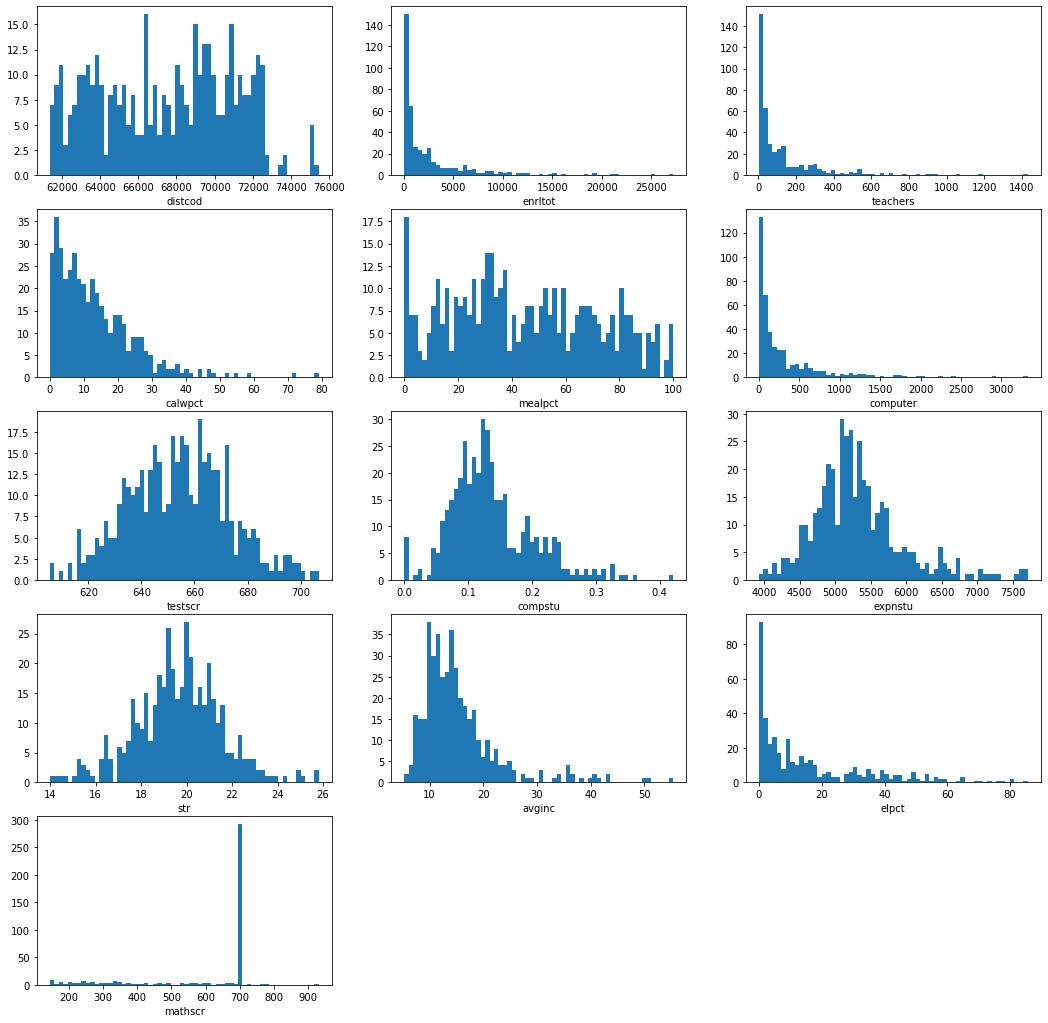

In [112]:
plt.figure(figsize=(18,18))
for i,col in enumerate(sample):
    plt.subplot(5,3,i+1)
    plt.xlabel(col)
    plt.hist(sample[col],bins=60)

In [107]:
X=sample[['distcod','enrltot','teachers','calwpct','mealpct','computer','testscr','compstu', 'expnstu','str','avginc','elpct']]
Y=sample['mathscr']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [108]:
Standard_scaler = StandardScaler()
X_S = Standard_scaler.fit_transform(X_train)
X_S1 = Standard_scaler.transform(X_test)

In [109]:
K_range = range(0, 15)
S2_val = [] 
for K in K_range:
    K = K+1
    reg1=KNeighborsRegressor(n_neighbors = K)
    reg1.fit(X_S,Y_train)
    Y_pred1=reg1.predict(X_S1)
    train_acc1=reg1.score(X_S,Y_train)
    test_acc1=reg1.score(X_S1,Y_test)
    r2 = r2_score(Y_test, Y_pred1)
    S2_val.append(r2)
    print("train accuracy of scaled data for k = ", K, "is",train_acc1 )
    print("test accuracy of scaled data for k=", K, "is",test_acc1, "& R2 score is ",r2,"\n")

train accuracy of scaled data for k =  1 is 1.0
test accuracy of scaled data for k= 1 is -0.0701244094942921 & R2 score is  -0.0701244094942921 

train accuracy of scaled data for k =  2 is 0.7506867886470813
test accuracy of scaled data for k= 2 is 0.12935127976969463 & R2 score is  0.12935127976969463 

train accuracy of scaled data for k =  3 is 0.6274083216296258
test accuracy of scaled data for k= 3 is 0.2592564804117712 & R2 score is  0.2592564804117712 

train accuracy of scaled data for k =  4 is 0.5427588819565381
test accuracy of scaled data for k= 4 is 0.25036351769577303 & R2 score is  0.25036351769577303 

train accuracy of scaled data for k =  5 is 0.46015735376505407
test accuracy of scaled data for k= 5 is 0.2955317188342945 & R2 score is  0.2955317188342945 

train accuracy of scaled data for k =  6 is 0.4297046683742878
test accuracy of scaled data for k= 6 is 0.32765030668583073 & R2 score is  0.32765030668583073 

train accuracy of scaled data for k =  7 is 0.428379

In [114]:
from sklearn.model_selection import GridSearchCV
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsRegressor()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_S,Y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 14


In [120]:
ypred2=clf.predict(X_S1)
train_acc2=clf.score(X_S,Y_train)
test_acc2=clf.score(X_S1,Y_test)

In [124]:
new_r2 = r2_score(Y_test, ypred2)

In [125]:
new_r2

0.4843563335346456